# Assignment 2
* In this assignment you will be working with three data files from iMDB:
    * cast.csv
    * release_dates.csv
    * titles.csv
* Using the appropriate file(s), answer the following questions
* Some questions can be completed with one-liners while others are a bit more involved
* Where appropriate, answers should also provide brief commentary
* Exclude data that doen't make senss, i.e. data from the future
* Once complete upload this notebook to your classwork Github repo and post the link on Canvas 

In [26]:
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
cast = pd.read_csv('cast.csv')
dates = pd.read_csv('release_dates.csv')
titles = pd.read_csv('titles.csv')

### 1. Conduct a high level assessment of the three data files, i.e. how many records are there, what kind of data, etc. Summarize your findings with annotation. 

We'll look at the cast dataset first. Below, we can see that there are almost 3.5 million records in this dataset. Looking at the first 10 entries, we can see that the column names are title, year, name, type, and n. We can also see that there are some missing values in the 'n' column. The columns with words are object datatypes, year is an integer, and 'n' is a float.

In [113]:
print(len(cast))
print(cast.dtypes)

cast.head(10)

3442642
title         object
year           int64
name          object
type          object
character     object
n            float64
decade         int64
dtype: object


,title,year,name,type,character,n,decade
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0,2010
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0,1980
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0,2010
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN,2010
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN,2010
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN,2010
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN,2010
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN,2000
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0,2010
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN,2010


The cell below shows us that nearly half of the records in 'cast' have a null value for n.

In [3]:
cast['n'].isna().sum()

1327783

Now let's have a look at the titles csv file. There are about 226,000 records in this dataset. There are two columns: title and year. The year column holds integers, and the title column is objects, more specifically strings.

In [17]:
print(len(titles))
print(titles.dtypes)

titles.head(10)

226013
title    object
year      int64
dtype: object


,title,year
0,Ankara ekspresi,1952
1,"Ans Vaterland, ans teure",1915
2,Miss Mohini,2002
3,La vera madre,1999
4,O Amerikanos,1993
5,Ostatnia misja,2000
6,Physics and the Pinewood Derby,2008
7,Duffy of San Quentin,1954
8,Pinsky,2017
9,Luang phii theng III,2010


Last is the release dates dataset. There are about 443,000 records. Here we have columns title, year, country, and date. Once again, title and country are objects, most likely strings. Year is integers. In the third print statement, we check to see the data type of a record in the date column. It is a string. If we wanted to use this column for certain analyses, we might want to convert these values to datetime objects.

In [24]:
print(len(dates))
print(dates.dtypes)
print(isinstance(dates['date'][1], str))
dates.head(10)

443486
title      object
year        int64
country    object
date       object
dtype: object
True


,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
5,#Lucky Number,2015,USA,2015-09-01
6,#Nerealnaya lyubov,2014,Russia,2014-02-13
7,#Pellichoopulu,2016,India,2016-07-29
8,#REALITYHIGH,2017,USA,2017-09-08
9,#Selfi,2017,Russia,2018-02-01


### 2. How many movies have the title North by Northwest

In [4]:
titles.head()

titles[titles['title']=='North by Northwest']

,title,year
201761,North by Northwest,1959


### 3. How many version of Hamlet are there, when was the first made? the last?

In [5]:
hamlets = titles[titles['title']=='Hamlet']
len(hamlets)

20

In [6]:
print(max(hamlets['year']))
print(min(hamlets['year']))

2017
1910


### 4. List all the movies called Treasure Island from oldest to newest

In [7]:
ti = titles[titles['title']=='Treasure Island']
ti = ti.sort_values(by=['year'], ascending=True)
ti

,title,year
180911,Treasure Island,1918
108853,Treasure Island,1920
87953,Treasure Island,1934
126321,Treasure Island,1950
190233,Treasure Island,1972
122150,Treasure Island,1973
52099,Treasure Island,1985
36752,Treasure Island,1999


### 5. How many movies were made in 1950? 1980? 2000? What conclusions can you draw from these data points?

In [8]:
titles['decade'] = (titles['year'] / 10).astype(int)*10
print(len(titles[titles['decade']==1950]))
print(len(titles[titles['decade']==1980]))
print(len(titles[titles['decade']==2000]))

12664
19532
35730


From these datapoints, we can see that there was slight growth in movie production from the 50's to the 80's. Between the 80's and 2000's, movie production exploded and the total number of releases nearly doubled.

### 6. How big was the cast of Metropolis


In [9]:
print(len(cast[cast['title']=='Metropolis']))
cast[cast['title']=='Metropolis']

33


,title,year,name,type,character,n
3416,Metropolis,1927,Alfred Abel,actor,Joh Fredersen,1.0
26389,Metropolis,1927,Fritz Alberti,actor,Creative Human - Man who Convinces Babel,NaN
193089,Metropolis,1927,Erwin Biswanger,actor,11811 - Georgy,6.0
542995,Metropolis,1927,Max Dietze,actor,Working Man,NaN
709318,Metropolis,1927,Gustav Fröhlich,actor,Freder - Joh Fredersen's Son,2.0
747304,Metropolis,1927,Heinrich George,actor,Grot - the Guardian of the Heart Machine,7.0
789295,Metropolis,1927,Heinrich Gotho,actor,Master of Ceremonies,NaN
1015520,Metropolis,1927,Georg John,actor,Working Man Who Causes Explosion of M-Machine,NaN
1110313,Metropolis,1927,Rudolf Klein-Rogge,actor,C.A. Rotwang - the Inventor,3.0
1141892,Metropolis,1927,Walter Kuehle,actor,Working Man,NaN


If we just counted the records in the above subset of the df, we would get a cast size of 33. However, upon closer inspection, we can see that there are duplicates in the name column. After we remove duplicate values, we get a cast size of 31.

### 7. How many roles for actors were there 1950's? 1990's

In [16]:
cast['decade'] = (cast['year'] / 10).astype(int)*10
actors = cast[cast['type']=='actor']
actors50s = actors[actors['decade']==1950]
#Number of actor roles in the 50's
print(len(actors50s))

#Number of actor roles in the 90's
actors90s = actors[actors['decade']==1990]
print(len(actors90s))

153559
245713


### 8. How many roles for actors & actresses over time? Output should be a line graph

Text(0.5, 1.0, 'Number of Roles per Decade')

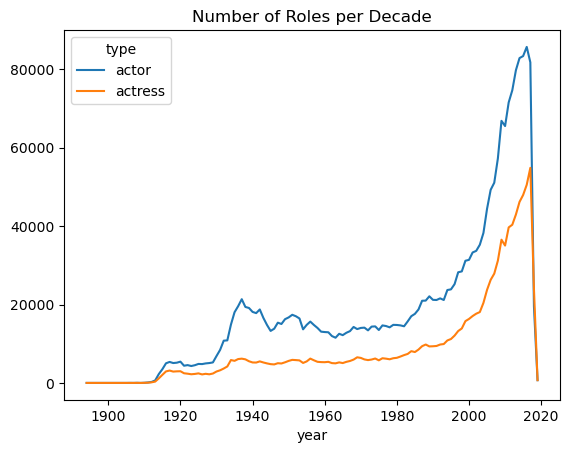

In [75]:
min(cast['decade']) #1890
max(cast['decade']) #2010
cast = cast[cast['decade']<2020]
plot_data = cast.groupby(['year', 'type']).size().unstack(fill_value=0)

plot_data.plot(kind='line')
plt.title('Number of Roles per Decade')

### 9. How many "leading roles" were there in the 2000's?

In [67]:
roles2000 = cast[cast['decade']==2000]
leadroles2000 = roles2000[roles2000['n']==1.0]
len(leadroles2000)

23593

### 10. How many roles received no ranking in the 2000's? 1950's. What conclusions can you draw from these two data points?

In [70]:
roles2000.isna().any(axis=1).sum()

232037

### 11. Plot the number of films made in each decade

Text(0.5, 1.0, 'Number of Films per Decade')

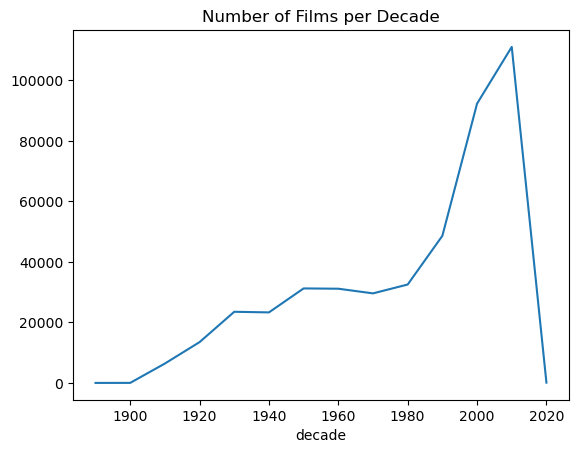

In [116]:
dates['decade'] = (dates['year'] / 10).astype(int)*10
dates = dates[dates['year']<2025]
plot_data = dates.groupby(['decade']).size()

plot_data.plot(kind='line')
plt.title('Number of Films per Decade')

### 12. Plot the number of films with a Rustler character over time

Text(0.5, 1.0, 'Number of Rustlers over Time')

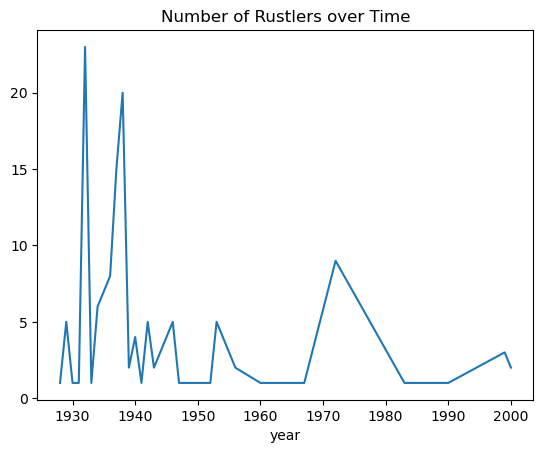

In [94]:
rustler = cast[cast['character']=='Rustler']

plot_data = rustler.groupby(['year']).size()

plot_data.plot(kind='line')
plt.title('Number of Rustlers over Time')

### 13. What are the top ten character names of all time?

In [37]:
cast['character'].value_counts().head(10)

Himself        19633
Dancer         12019
Extra          10848
Reporter        7818
Doctor          6963
Party Guest     6783
Student         6631
Policeman       6424
Bartender       6290
Herself         6264
Name: character, dtype: int64

### 14. Which actor appeared in the most films in the 1990's decade?

In [40]:
ninties = cast[cast['decade']==1990]

ninties.groupby('name')['title'].nunique().idxmax()

'Shakti Kapoor'

### 15. What are the top 10 roles that start with Science?

In [8]:
science = cast[cast['character'].str.startswith('Science')]
science['character'].value_counts().head(10)

Science Teacher         57
Science Fair Student     9
Science Student          6
Science Fair Judge       6
Science Kid              5
Science Fair Kid         5
Science Reporter         5
Science                  4
Science Officer          3
Science teacher          3
Name: character, dtype: int64

### 16. What film has the largest cast

In [13]:
cast_sizes = cast['title'].value_counts()
cast_sizes.idxmax()

'Around the World in 80 Days'

### 17. Generate descriptive statistics for cast size. Briefly comment on the results

In [14]:
cast_sizes.describe()

count    168255.000000
mean         20.462405
std          24.206617
min           1.000000
25%           6.000000
50%          13.000000
75%          26.000000
max        1364.000000
Name: title, dtype: float64

From these statistics, we can see that the average cast size for movies in this dataset is about 20. The largest cast is over a thousand, and there is at least one film with a single character. The film with the largest cast is a huge outlier, as the top 25% largest cast sizes are anything above 26.

### 18. How many films has Natalie Portman been in in each year throughout her career?

In [49]:
portman = cast[cast['name']=='Natalie Portman']
portman.groupby('year').size()

year
1995    1
1996    3
1999    3
2000    1
2001    1
2002    1
2003    1
2004    2
2005    4
2006    2
2007    3
2008    1
2009    2
2010    4
2011    3
2013    1
2015    4
2016    3
2017    1
dtype: int64

### 19. How many films did Natalie Portman appear in each year where where she was either the top star or co-star?

In [73]:
portman = portman.dropna()
portman = portman[portman['n']<=2.0]
portman.groupby('year').size()

year
1999    1
2000    1
2002    1
2005    3
2006    2
2007    1
2008    1
2009    1
2010    2
2011    2
2013    1
2015    2
2016    2
dtype: int64

### 20. Determine how many roles for actor or actress by decade. Plot the output 

Text(0.5, 1.0, 'Number of Roles per Decade')

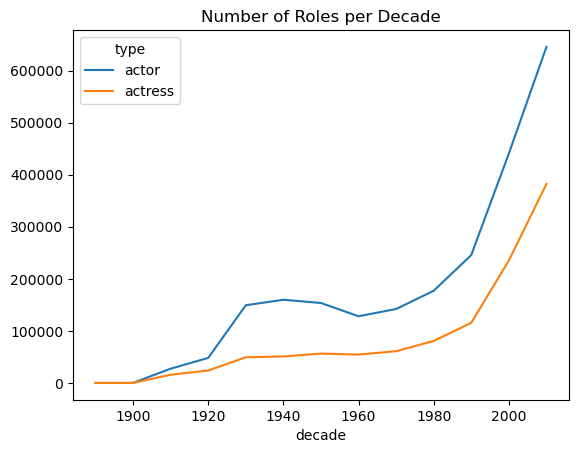

In [74]:
cast = cast[cast['decade']<2020]
plot_data = cast.groupby(['decade', 'type']).size().unstack(fill_value=0)

plot_data.plot(kind='line')
plt.title('Number of Roles per Decade')

### 21. Determine and comment on the day of the week that movies are released. What is notable about release days and months throughout the year? (Use pd.pivot_table)

In [40]:
dates['date'] = pd.to_datetime(dates['date'])
dates['day_of_the_week'] = dates['date'].dt.day_name()
dates['month'] = dates['date'].dt.month

dates_pivot = pd.pivot_table(dates
                             , index=['month', 'day_of_the_week']
                             , values='title'
                             , aggfunc='count')
#dates_pivot = dates_pivot.reindex(['Monday'
 #                                  , 'Tuesday'
  #                                 , 'Wednesday'
   #                                , 'Thursday'
    #                               , 'Friday'
     #                              , 'Saturday'
      #                             , 'Sunday'])
pd.set_option('display.max_columns', 3) 
pd.set_option('display.max_rows', 84)
dates_pivot

title
month day_of_the_week       
1     Friday           13734
      Monday            3699
      Saturday          2925
      Sunday            1822
      Thursday         10746
      Tuesday           1823
      Wednesday         4663
2     Friday           13833
      Monday            3138
      Saturday          2395
      Sunday            1277
      Thursday         10356
      Tuesday           1190
      Wednesday         4118
3     Friday           15268
      Monday            3383
      Saturday          2742
      Sunday            1228
      Thursday         11844
      Tuesday           1313
      Wednesday         4479
4     Friday           13559
      Monday            3168
      Saturday          2868
      Sunday            1358
      Thursday         10625
      Tuesday           1446
      Wednesday         4650
5     Friday           13198
      Monday            3050
      Saturday          2270
      Sunday            1165
      Thursday         10100
      Tuesday           1377
      Wednesday         4289
6     Friday           11997
      Monday            2337
      Saturday          2409
      Sunday            1031
      Thursday          9469
      Tuesday           1179
      Wednesday         4282
7     Friday           11635
      Monday            2267
      Saturday          2291
      Sunday             894
      Thursday          8947
      Tuesday           1144
      Wednesday         4243
8     Friday           13430
      Monday            2844
      Saturday          2277
      Sunday            1138
      Thursday          9931
      Tuesday           1121
      Wednesday         4270
9     Friday           14523
      Monday            3161
      Saturday          2551
      Sunday            1332
      Thursday         10713
      Tuesday           1309
      Wednesday         4161
10    Friday           14893
      Monday            3551
      Saturday          2700
      Sunday            1423
      Thursday         11490
      Tuesday           1542
      Wednesday         4605
11    Friday           14084
      Monday            3372
      Saturday          2547
      Sunday            1342
      Thursday         10859
      Tuesday           1415
      Wednesday         4582
12    Friday           13020
      Monday            3240
      Saturday          3357
      Sunday            1813
      Thursday         10666
      Tuesday           1903
      Wednesday         5097

In looking at the entire pivot table, it looks as though Friday and Thursday are the most popular release days. Midweek and Sunday releases are generally uncommon, although they seem to increase slightly during the summer months.

### 22. Can you plot the pivot table? Is the output "correct"? Can you fix it?

<Axes: xlabel='month,day_of_the_week'>

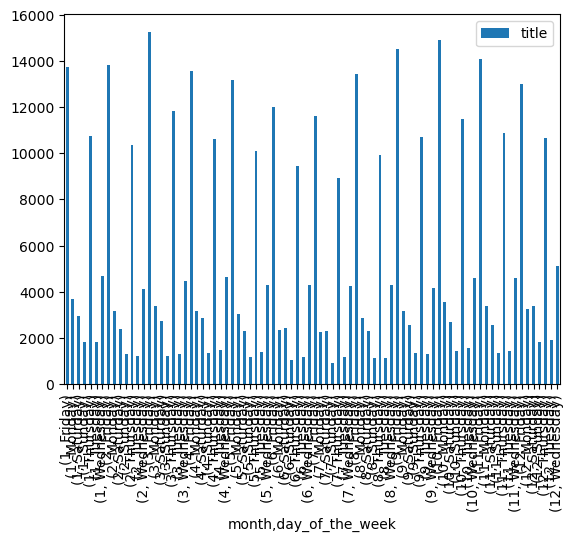

In [41]:
dates_pivot.plot(kind='bar')

The problem here is plotting both month and day of the week. Simply passing the pivot table into a plt.plot function produces this awful mess of a bar chart. 

### 23. What films did actors in Star Wars go on to appear in? 

In [42]:
starwars = cast[cast['title'].str.startswith('Star Wars')]
swactors = starwars['name']


3915        Ian Abercrombie
3916        Ian Abercrombie
5548       Gerald W. Abrams
7757            David Acord
7758            David Acord
                 ...       
3404194    Aaliyah Williams
3408868          Liz Wilson
3410700       Keira Wingate
3419581       Kristy Wright
3427205    Phoebe Yiamkiati
Name: name, Length: 1193, dtype: object

Since there are over a thousand actors across the Star Wars cinematic universe, lets have a look at some of the lead roles and where they ended up.

In [50]:
#pd.reset_option('all')
swtop = starwars[starwars['n']<2.0]
swtop

#We'll look at Mark Hamill and Ewan McGregor
sw = cast[cast['name']=='Mark Hamill']
sw = sw[sw['year']>1977]
sw

,title,year,name,type,character,n
848913,Back to the Sea,2012,Mark Hamill,actor,Bunker,4.0
848914,Batman: Mask of the Phantasm,1993,Mark Hamill,actor,The Joker,11.0
848915,Batman: The Killing Joke,2016,Mark Hamill,actor,The Joker,2.0
848916,Brigsby Bear,2017,Mark Hamill,actor,Ted Mitchum,2.0
848917,Britannia Hospital,1982,Mark Hamill,actor,Red: The Media,17.0
848918,Bunyan and Babe,2017,Mark Hamill,actor,Grandpa,7.0
848919,Con Man,2018,Mark Hamill,actor,Robert Minkow,NaN
848920,Corvette Summer,1978,Mark Hamill,actor,Kenneth W. Dantley Jr.,1.0
848921,Guyver,1991,Mark Hamill,actor,Max Reed,6.0
848922,Hamilton,1998,Mark Hamill,actor,Hawkins,3.0


Here we can see that Mark Hamill found great success as an actor following his Star Wars debut. He's been in big movies like Kingsmen and two Batman movies. 

In [52]:
sw = cast[cast['name']=='Ewan McGregor']
sw = sw[sw['year']>1977]
sw = sw[sw['n']<2.0]
sw

,title,year,name,type,character,n
1367201,American Pastoral,2016,Ewan McGregor,actor,Swede Levov,1.0
1367205,Beginners,2010,Ewan McGregor,actor,Oliver,1.0
1367207,Big Fish,2003,Ewan McGregor,actor,Ed Bloom - Young,1.0
1367211,Cassandra's Dream,2007,Ewan McGregor,actor,Ian Blaine,1.0
1367213,Deception,2008,Ewan McGregor,actor,Jonathan McQuarry,1.0
1367216,Eye of the Beholder,1999,Ewan McGregor,actor,Eye,1.0
1367223,Last Days in the Desert,2015,Ewan McGregor,actor,Jesus,1.0
1367224,Last Days in the Desert,2015,Ewan McGregor,actor,Devil,1.0
1367236,Rogue Trader,1999,Ewan McGregor,actor,Nick Leeson,1.0
1367242,Star Wars: Episode II - Attack of the Clones,2002,Ewan McGregor,actor,Obi-Wan Kenobi,1.0


McGregor went on to film 60 movies after his Star Wars debut, including movies like a Million Ways to Die in the West, including over 20 movies in which he was a lead role.